# Data Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid") # set a nice theme for the plots

In [4]:
# Create an array of 100 equally spaced numbers between 0 to 10
x = np.linspace(0,10,100)
# Calculate the sine of each x value
y = np.sin(x)

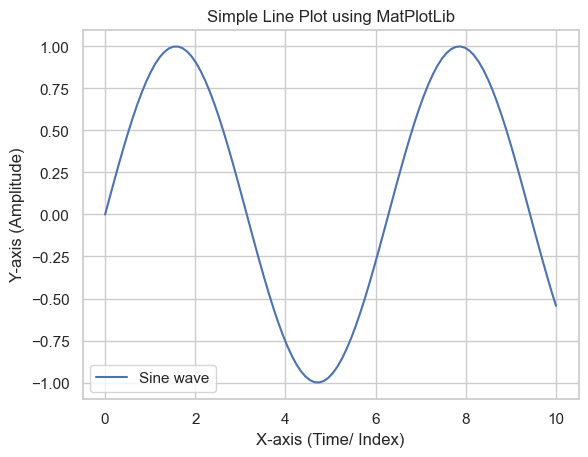

In [10]:
# plt.plot(x, y, label="Sine wave", color='blue', linestyle ='--')
plt.plot(x, y, label="Sine wave")
plt.title("Simple Line Plot using MatPlotLib")
plt.xlabel("X-axis (Time/ Index)")
plt.ylabel("Y-axis (Amplitude)")
plt.legend()
plt.show()

# Seaborn Example


In [12]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 1. Distribution Plot


<Axes: xlabel='total_bill', ylabel='Count'>

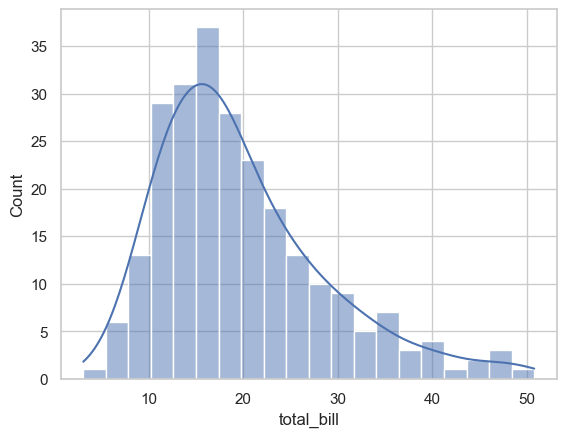

In [17]:
# Histplot represents the distribution of univariate set of observations
sns.histplot(data = tips, x="total_bill", kde =True, bins = 20)
# kde- kernel density estimation
# It represents the frequency of data points within the specified range (bins)


<Axes: xlabel='total_bill', ylabel='Count'>

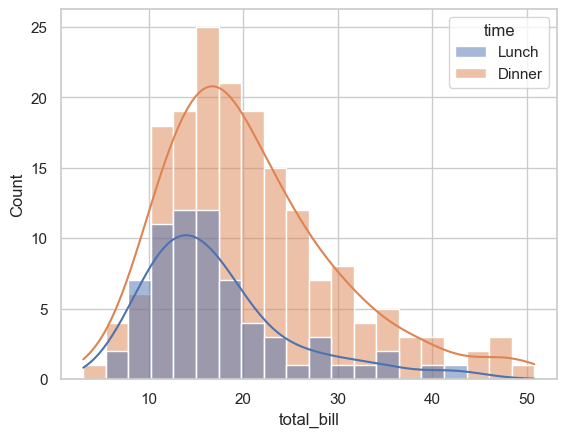

In [18]:
sns.histplot(data = tips, x="total_bill", kde =True, bins = 20 , hue = "time")


# Skewness -- Right Skew curved

In [20]:
tips["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

## 2. Box Plot

<Axes: xlabel='day', ylabel='total_bill'>

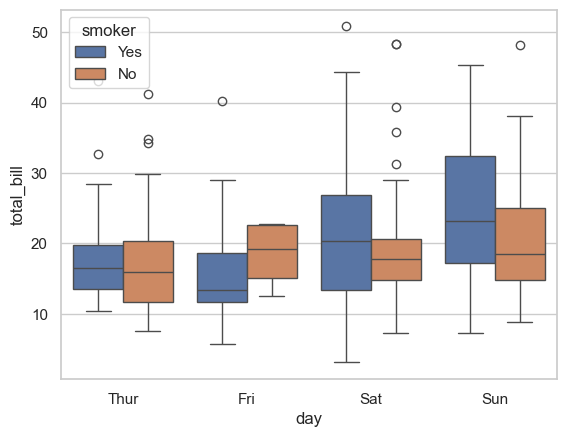

In [33]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")
# lower threshold, q1, median, q3, upper threshold, outliers

In [32]:
tips[(tips["day"]=="Fri") & (tips["smoker"]=="Yes")]

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2


## 3. Relational Plot

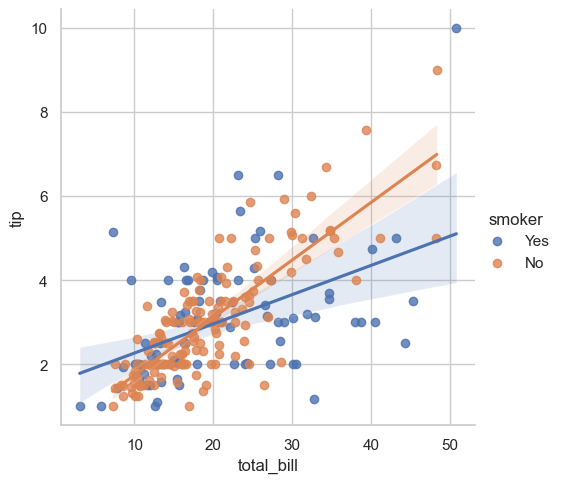

In [36]:
sns.lmplot(data=tips, x="total_bill",y="tip",hue="smoker")

## 4. Joint Distribution

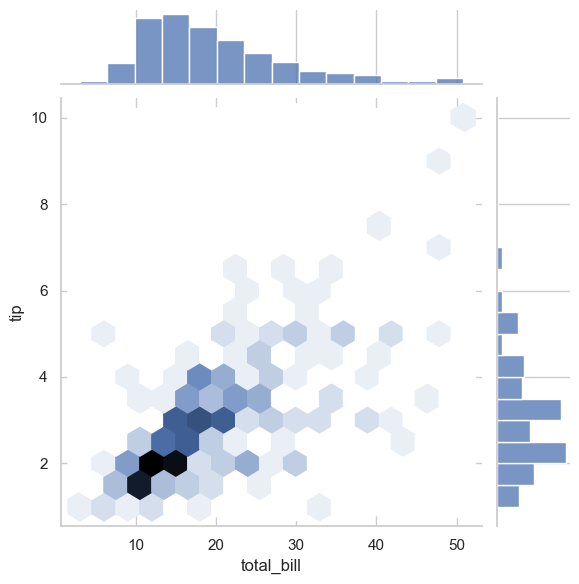

In [37]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

## 5. Matrix Plot (Correlation)

In [41]:
numeric_cols = tips.select_dtypes(include=[np.number])
numeric_cols
corr = numeric_cols.corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

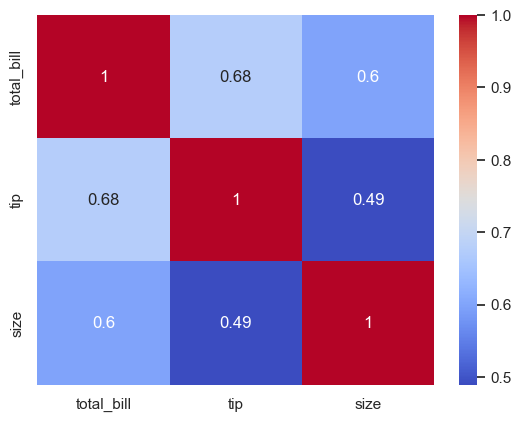

In [43]:
sns.heatmap(corr, annot=True, cmap="coolwarm")

## 6. Pie and Donut Chart

In [46]:
# Prepare data: Count occurence of each day
day_counts = tips['day'].value_counts()
day_counts

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

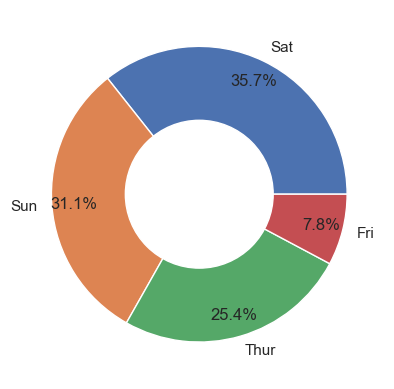

In [51]:
plt.pie(day_counts, labels=day_counts.index, autopct="%1.1f%%", pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show

## 6. Bar Chart

<Axes: ylabel='total_bill'>

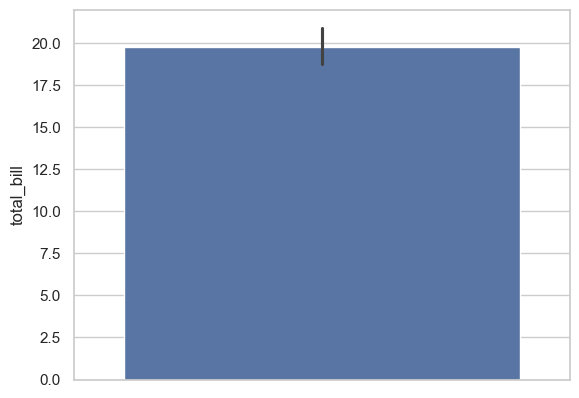

In [53]:
sns.barplot(data=tips, y="total_bill")

<Axes: xlabel='day', ylabel='total_bill'>

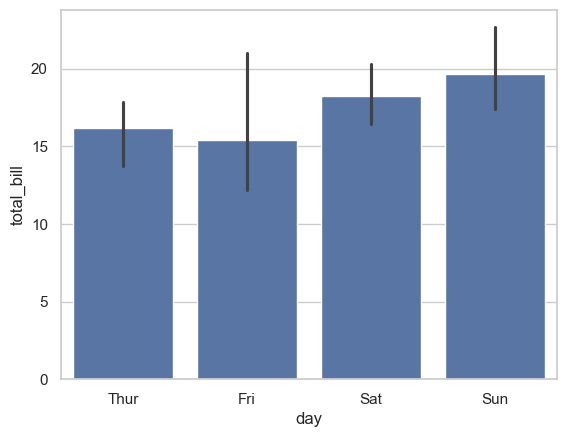

In [56]:
sns.barplot(data=tips,x="day", y="total_bill", estimator=np.median)

In [58]:
float(tips["total_bill"].mean())

19.78594262295082

<Axes: xlabel='day', ylabel='total_bill'>

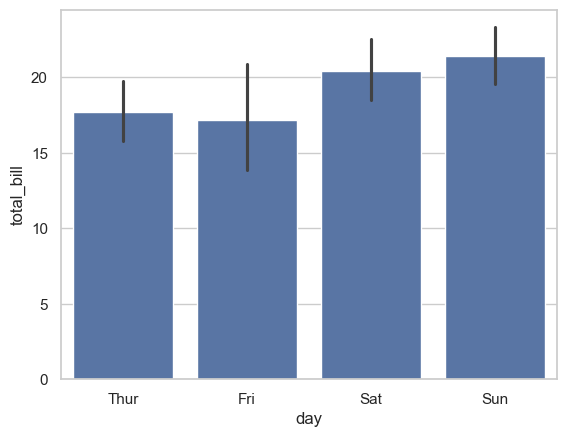

In [59]:
sns.barplot(data=tips,x="day", y="total_bill", estimator=np.mean)

<Axes: xlabel='day', ylabel='count'>

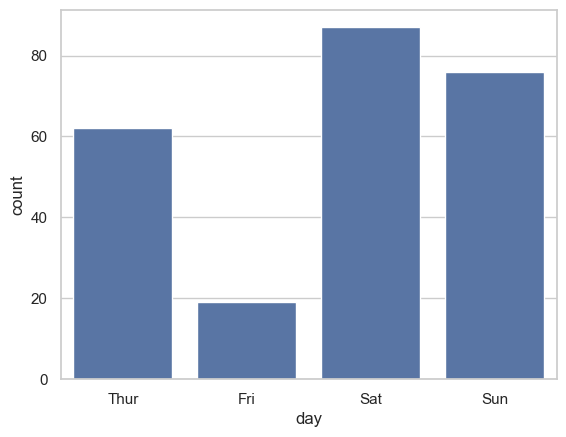

In [60]:
sns.countplot(data=tips, x="day")

<Axes: xlabel='smoker', ylabel='count'>

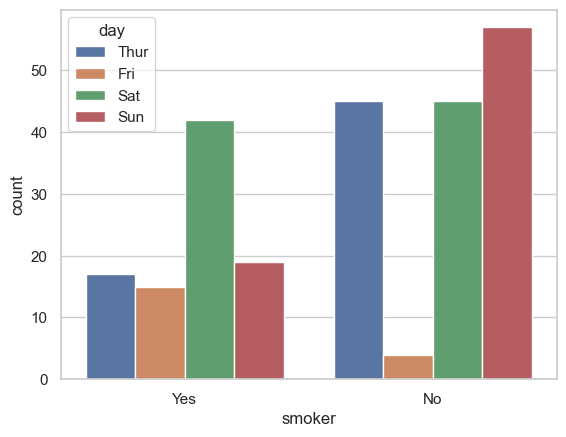

In [62]:
sns.countplot(data=tips, x="smoker", hue="day")

# EDA

In [80]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [65]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [66]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
177/900


0.19666666666666666

In [69]:
688/900

0.7644444444444445

In [85]:
## Missing value treatment. ## impute/ replace null values with - 0, mean, median, mode, predict the null values using other column values
# df['age'].fillna(df['age'].mean(), inplace=True) 
df.fillna({'age': df['age'].mean()}, inplace=True)  


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
age = [1,2,3,4,5,6,7,8,9,10]
print(np.mean(age))
print(np.median(age))

5.5
5.5


In [72]:
age = [1,2,3,4,5,6,7,8,9,10,1000]
print(np.mean(age))
print(np.median(age))

95.9090909090909
6.0


<Axes: ylabel='age'>

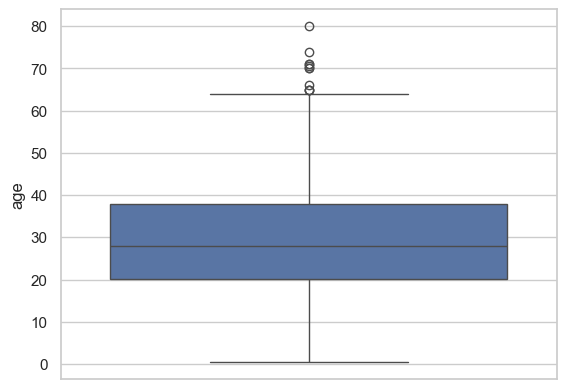

In [74]:
sns.boxplot(data = df, y='age')

In [86]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [87]:
df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: str

In [ ]:
df.fillna({'embarked': df['embarked'].mode()[0]}, inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [103]:
df['embarked'].mode()

0    S
Name: embarked, dtype: str

In [91]:
df.drop('deck', axis=1, inplace=True)

In [107]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [109]:
df.fillna({'embark_town': df['embark_town'].mode()[0]}, inplace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [110]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

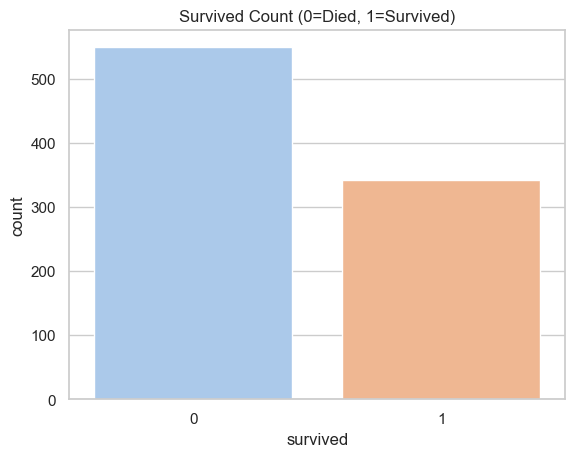

In [116]:
sns.countplot(data=df, x='survived',hue='survived',legend=False, palette='pastel')
plt.title("Survived Count (0=Died, 1=Survived)")
plt.show()

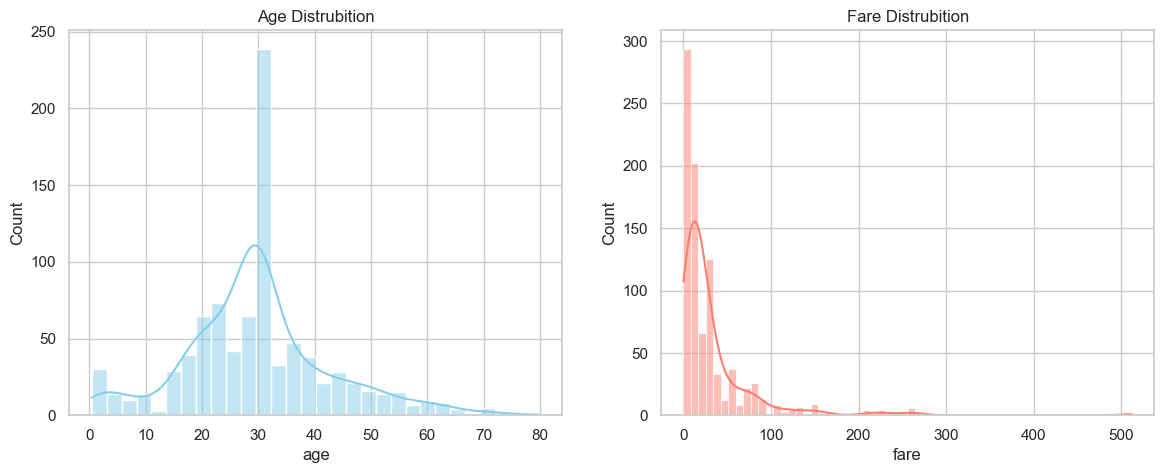

In [124]:
# Create a fig with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize = (14,5))

# Plot 1: Age Distrubition
sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distrubition')

# Plot 2: Fare Distrubition
sns.histplot(df['fare'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Fare Distrubition')

plt.show()

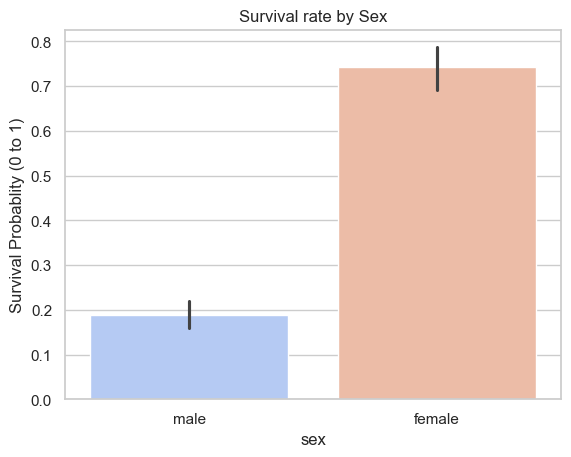

In [130]:
sns.barplot(data=df, x='sex', y='survived', hue='sex',legend=False, palette='coolwarm')

plt.title("Survival rate by Sex")
plt.ylabel('Survival Probablity (0 to 1)')
plt.show()

Text(0.5, 1.0, 'Log- Transformed Fare Distribution by Survival')

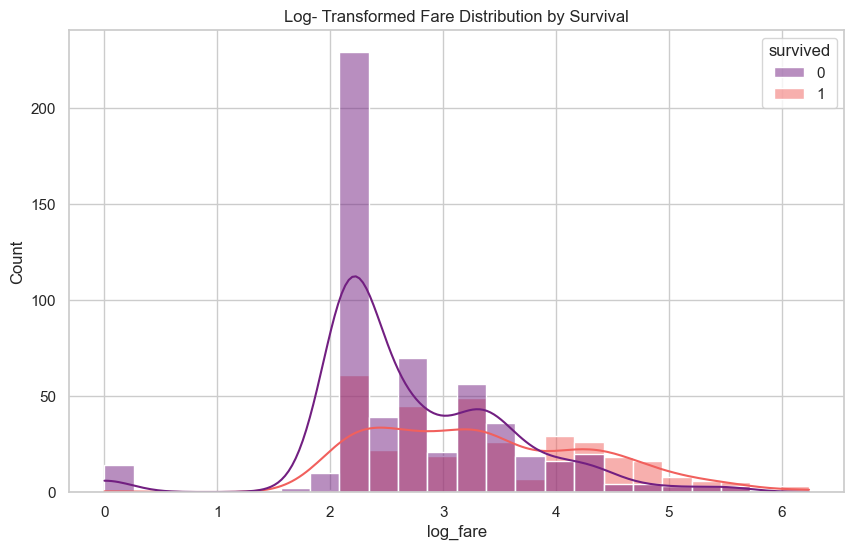

In [132]:
df['log_fare'] = np.log1p(df['fare'])

plt.figure(figsize=(10,6))

# Plot the transformed fare
sns.histplot(data=df, x='log_fare', hue='survived', kde=True, palette="magma")
plt.title("Log- Transformed Fare Distribution by Survival")